In [1]:
import numpy as np

x = np.random.randint(10,50,100).reshape(20,5)
print(x)
x_meaned = x - x.mean(axis=0)
print(x_meaned)
cov_mat = np.cov(x_meaned , rowvar = False)
print(cov_mat)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
print(eigen_values)
print(eigen_vectors)

sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
print(sorted_eigenvalue)
sorted_eigenvectors = eigen_vectors[:,sorted_index]
print(sorted_eigenvectors)
n_components = 3
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
#print(eigenvector_subset)
x_reduced = np.dot(eigenvector_subset.transpose(),x_meaned.transpose()).transpose()
print(x_reduced)

[[13 47 11 33 45]
 [42 32 43 16 46]
 [29 24 12 46 33]
 [16 37 17 48 46]
 [10 37 14 22 41]
 [30 10 34 26 14]
 [31 42 10 16 40]
 [17 22 14 49 46]
 [33 36 22 34 24]
 [35 17 18 38 38]
 [43 38 38 40 15]
 [39 29 41 37 37]
 [49 30 29 22 46]
 [46 22 32 15 23]
 [26 17 16 35 24]
 [16 32 20 23 33]
 [24 39 36 21 10]
 [47 40 40 49 35]
 [42 35 20 25 21]
 [44 15 40 21 28]]
[[-18.6   16.95 -14.35   2.2   12.75]
 [ 10.4    1.95  17.65 -14.8   13.75]
 [ -2.6   -6.05 -13.35  15.2    0.75]
 [-15.6    6.95  -8.35  17.2   13.75]
 [-21.6    6.95 -11.35  -8.8    8.75]
 [ -1.6  -20.05   8.65  -4.8  -18.25]
 [ -0.6   11.95 -15.35 -14.8    7.75]
 [-14.6   -8.05 -11.35  18.2   13.75]
 [  1.4    5.95  -3.35   3.2   -8.25]
 [  3.4  -13.05  -7.35   7.2    5.75]
 [ 11.4    7.95  12.65   9.2  -17.25]
 [  7.4   -1.05  15.65   6.2    4.75]
 [ 17.4   -0.05   3.65  -8.8   13.75]
 [ 14.4   -8.05   6.65 -15.8   -9.25]
 [ -5.6  -13.05  -9.35   4.2   -8.25]
 [-15.6    1.95  -5.35  -7.8    0.75]
 [ -7.6    8.95  10.65  -9.8  -

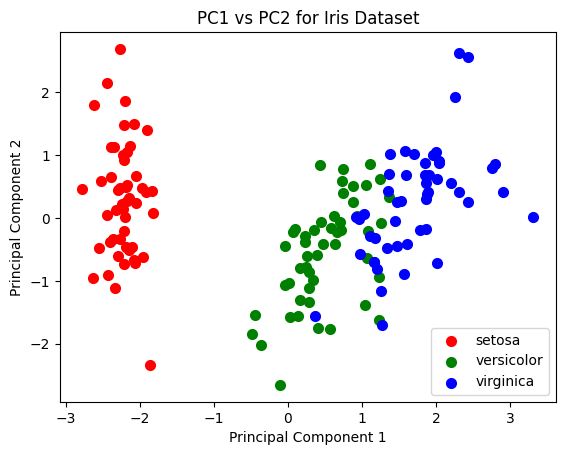

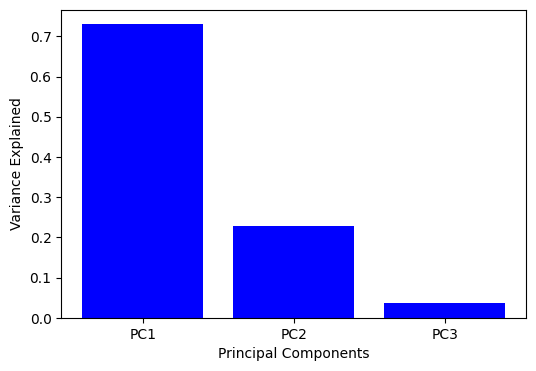

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce the dimensionality to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plot PC1 vs PC2 with color-coded data for the 3 flower classes
colors = ['r', 'g', 'b']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, lw=2, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.title('PC1 vs PC2 for Iris Dataset')
plt.show()

# Simplified Scree plot
plt.figure(figsize=(6, 4))
explained_variance = pca.explained_variance_ratio_
plt.bar(['PC1', 'PC2','PC3'], explained_variance, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()
